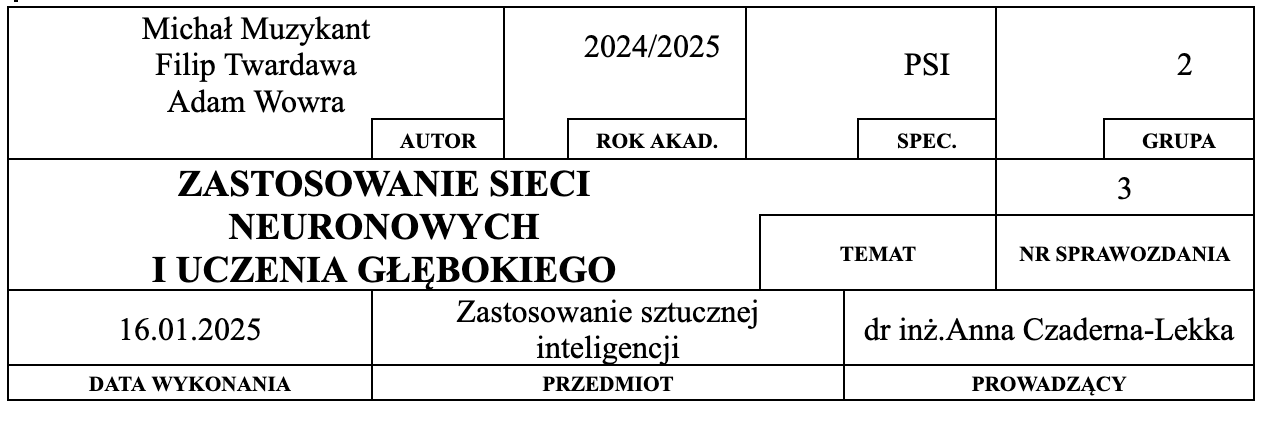

---

# IMPORT ODPOWIEDNICH BIBLIOTEK


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Ładowanie i wstępne przetwarzanie zbioru danych CIFAR-10
#### CIFAR-10 to zbiór obrazów składający się z 60 000 kolorowych obrazków (32x32 piksele) podzielonych na 10 klas.
#### Zbiór treningowy (50 000 próbek) oraz testowy (10 000 próbek) są automatycznie pobierane za pomocą modułu datasets.




In [ ]:

# Importowanie zbioru danych CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizacja danych wejściowych
# Dzielimy wartości pikseli przez 255.0, aby przeskalować je do zakresu [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0


# Klasy CIFAR-10 i Wizualizacja przykładowych obrazów z każdej klasy

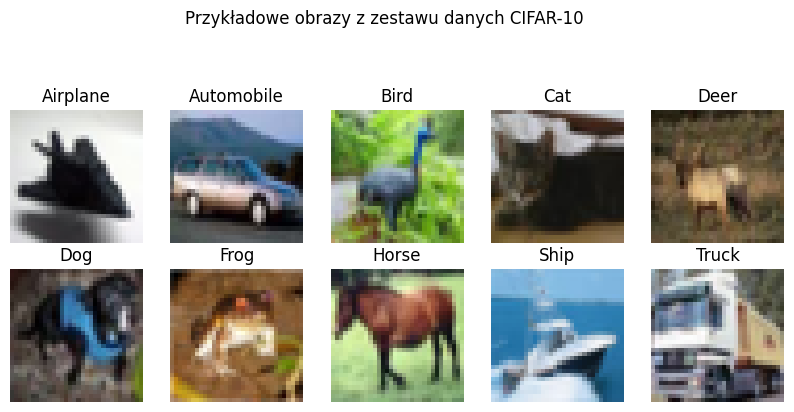

In [ ]:
# # CIFAR-10 zawiera obrazy podzielone na 10 kategorii:
# Samolot, Samochód, Ptak, Kot, Jeleń, Pies, Żaba, Koń, Statek i Ciężarówka.
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Dla każdej klasy wybierany jest pierwszy obraz i wyświetlany wraz z etykietą.
plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[y_train.flatten() == i][0])
    plt.title(class_names[i])
    plt.axis("off")
plt.suptitle("Przykładowe obrazy z zestawu danych CIFAR-10")
plt.show()

# Wizualizacja rozkładu liczby obrazów w każdej klasie (zbiór treningowy)

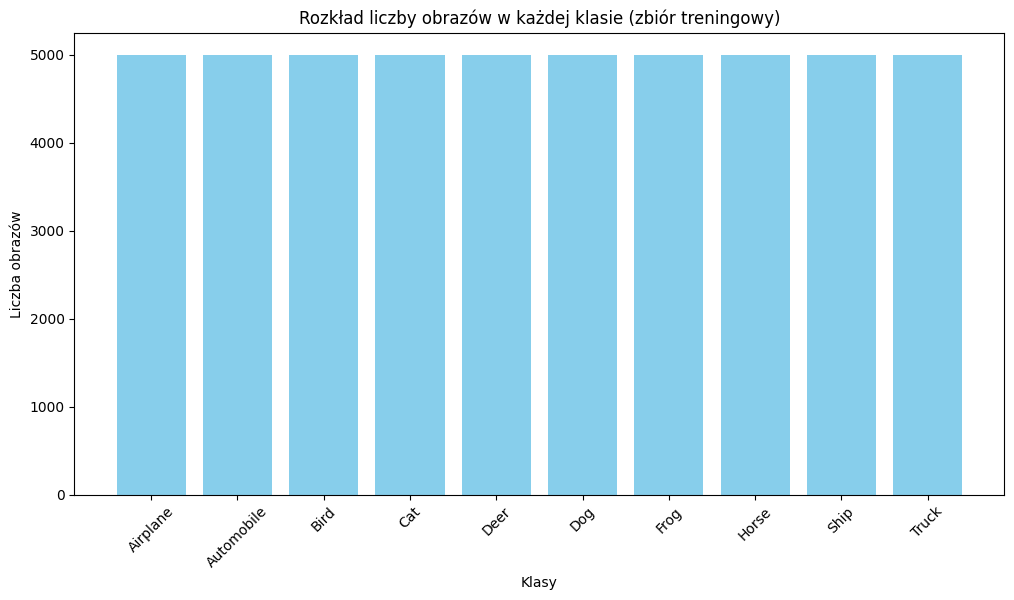

In [ ]:
# Liczenie liczby obrazów przypisanych do każdej klasy w zbiorze treningowym.
class_counts = np.bincount(y_train.flatten())

# Rysowanie wykresu słupkowego przedstawiającego rozkład klas.
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Rozkład liczby obrazów w każdej klasie (zbiór treningowy)")
plt.xlabel("Klasy")
plt.ylabel("Liczba obrazów")
plt.xticks(rotation=45)
plt.show()

# Obliczenie podstawowych statystyk wartości pikseli
#### Średnia i odchylenie standardowe pomagają zrozumieć rozkład danych wejściowych.

In [ ]:
# Obliczenie średniej wartości pikseli w zbiorze treningowym
mean_pixel_value = x_train.mean()

# Obliczenie odchylenia standardowego wartości pikseli
std_pixel_value = x_train.std()

# Wyświetlenie wyników
print(f"Średnia wartość pikseli: {mean_pixel_value:.2f}")
print(f"Odchylenie standardowe wartości pikseli: {std_pixel_value:.2f}")

Średnia wartość pikseli: 0.47
Odchylenie standardowe wartości pikseli: 0.25


# Wyświetlenie siatki obrazów: po 5 obrazów z każdej klasy
#### Tworzymy wizualizację złożoną z 50 obrazów (5 obrazów z każdej klasy) dla lepszego wglądu w dane.

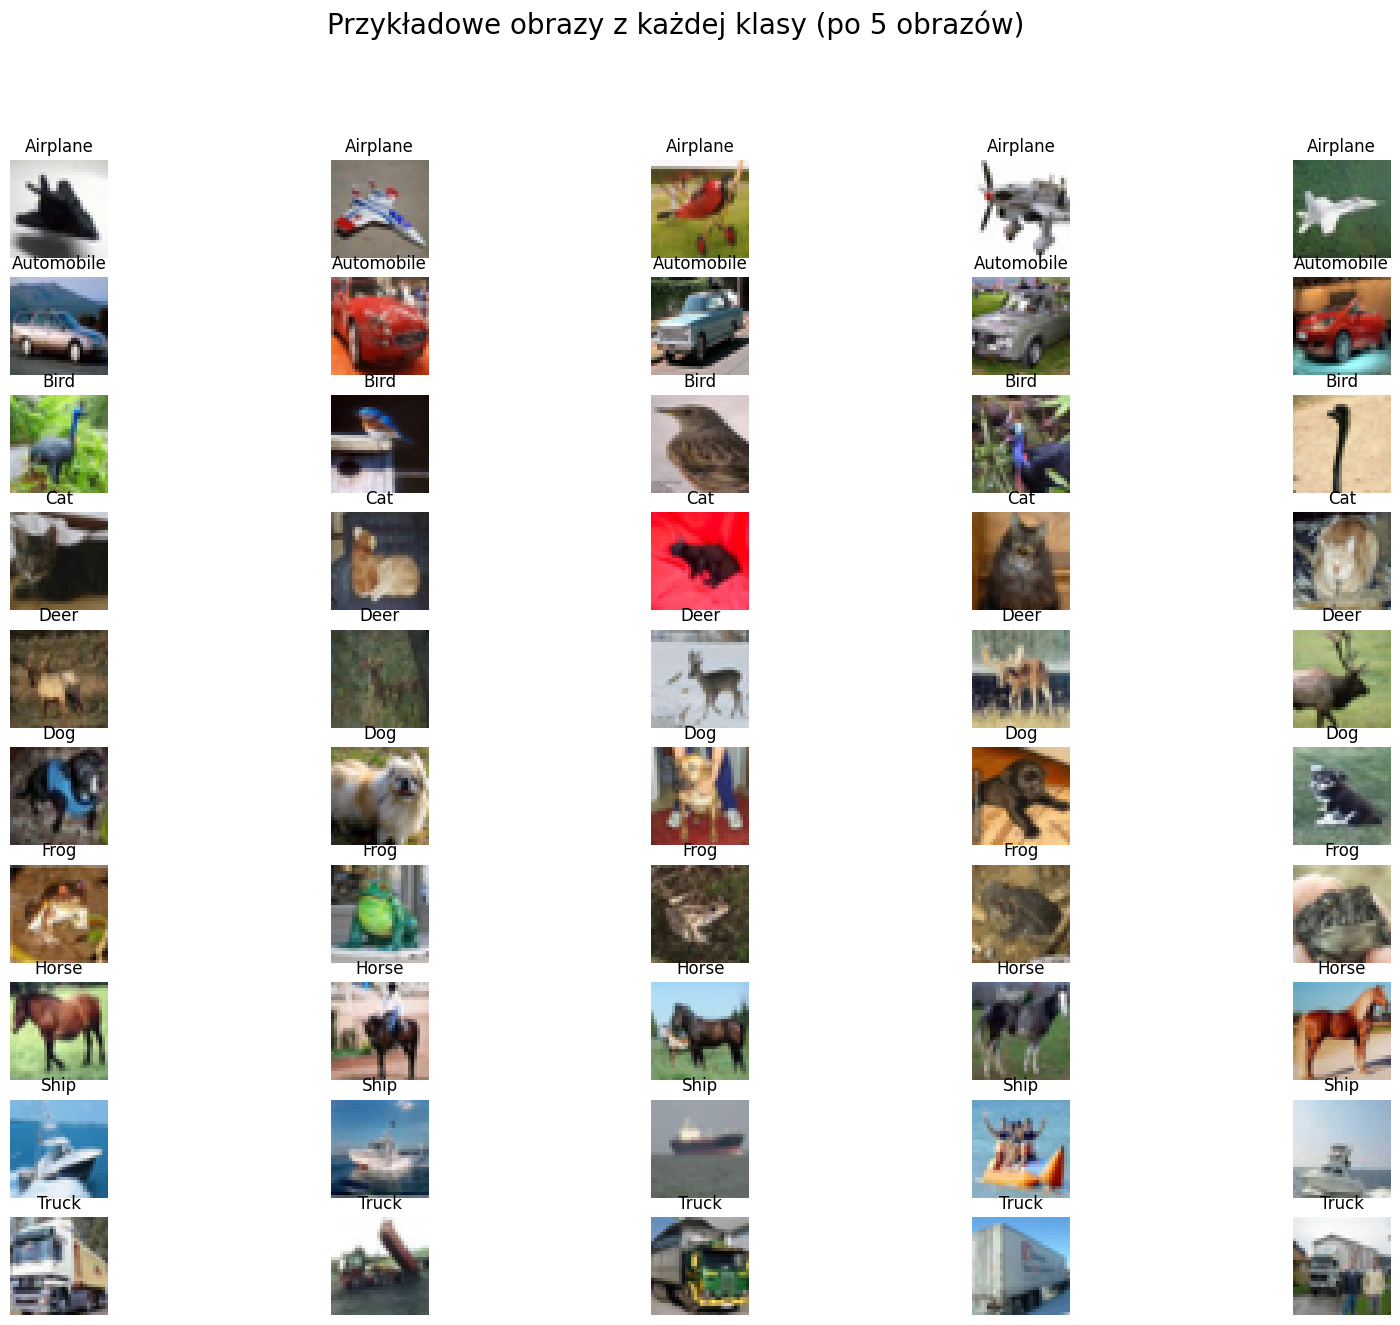

In [ ]:
# Ustawienie rozmiaru figury
plt.figure(figsize=(20, 15))

# Liczba obrazów do wyświetlenia dla każdej klasy
images_per_class = 5

for class_idx in range(10):
  # Wybór pierwszych 5 obrazów z bieżącej klas
    class_images = x_train[y_train.flatten() == class_idx][:images_per_class]
    for img_idx in range(images_per_class):
        plt_idx = class_idx * images_per_class + img_idx + 1
        ax = plt.subplot(10, images_per_class, plt_idx)
        plt.imshow(class_images[img_idx])
        plt.title(class_names[class_idx])
        plt.axis("off")

plt.suptitle("Przykładowe obrazy z każdej klasy (po 5 obrazów)", fontsize=20)
plt.show()

# Konwersja etykiet na kodowanie one-hot
#### W kodowaniu one-hot każda etykieta klasy jest reprezentowana jako wektor binarny,gdzie tylko jedna wartość jest równa 1, a pozostałe 0.

In [ ]:
# Konwersja etykiet zbioru treningowego
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Konwersja etykiet zbioru testowego
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 1. Definicja prostego modelu CNN (Convolutional Neural Network)

In [ ]:
# Sekwencyjny model warstwowy
model = models.Sequential([
    # Warstwa splotowa (Convolutional Layer)
    # Użycie 32 filtrów o wymiarach 3x3 i funkcji aktywacji ReLU.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
     # Warstwa maksymalnego próbkowania (MaxPooling Layer)
    # Redukcja wymiarów danych przez wybór maksymalnej wartości z obszarów 2x2.
    layers.MaxPooling2D((2, 2)),
    # Druga warstwa splotowa
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Druga warstwa maksymalnego próbkowania
    layers.MaxPooling2D((2, 2)),
    # Trzecia warstwa splotowa
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Spłaszczenie danych (Flatten)
    # Konwersja danych z formatu 2D na wektor 1D, aby przekazać je do warstw gęstych (Dense).
    layers.Flatten(),
    # Gęsta warstwa (Dense Layer)
    # Warstwa ukryta z 64 neuronami i funkcją aktywacji ReLU.
    layers.Dense(64, activation='relu'),
    # Warstwa wyjściowa
    # 10 neuronów wyjściowych (po jednym dla każdej klasy) z funkcją aktywacji softmax.
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Kompilacja modelu

In [ ]:
# Określenie optymalizatora, funkcji straty oraz metryki oceny wydajności.
# - Optymalizator: Adam (adaptacyjny algorytm optymalizacji)
# - Funkcja straty: categorical_crossentropy (dla klasyfikacji wieloklasowej z kodowaniem one-hot)
# - Metryka: accuracy (dokładność klasyfikacji)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trenowanie modelu
# Model uczy się na danych treningowych przez określoną liczbę epok.
# walidacja modelu na zbiorze testowym w każdej epoce.
# - epochs: Liczba epok treningowych (w tym przypadku 75)
# - validation_data: Zbiór danych walidacyjnych (x_test, y_test)
history = model.fit(x_train, y_train, epochs=75, validation_data=(x_test, y_test))

Epoch 1/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3518 - loss: 1.7559 - val_accuracy: 0.5284 - val_loss: 1.3175
Epoch 2/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5795 - loss: 1.1919 - val_accuracy: 0.6065 - val_loss: 1.1147
Epoch 3/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6358 - loss: 1.0320 - val_accuracy: 0.6683 - val_loss: 0.9524
Epoch 4/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6858 - loss: 0.8968 - val_accuracy: 0.6868 - val_loss: 0.9149
Epoch 5/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7104 - loss: 0.8248 - val_accuracy: 0.6911 - val_loss: 0.9015
Epoch 6/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7355 - loss: 0.7620 - val_accuracy: 0.7062 - val_loss: 0.8586
Epoch 7/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.7522 - loss: 0.7065 - val_accuracy: 0.7108 - val_loss: 0.8660
Epoch 8/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7704 -

# 2. Model pośredni (głębsza sieć CNN)

#### W tym modelu dodano więcej neuronów w warstwie gęstej, co zwiększa zdolność modelu do uczenia się bardziej złożonych cech.


In [ ]:
# Sekwencyjny model warstwowy
intermediate_model = models.Sequential([
    # Warstwa splotowa (Conv2D)
    # 32 filtry o wymiarach 3x3 i funkcja aktywacji ReLU.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Warstwa maksymalnego próbkowania (MaxPooling2D)
    # Redukcja wymiarów przez próbkowanie 2x2
    layers.MaxPooling2D((2, 2)),
    # Druga warstwa splotowa
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Druga warstwa maksymalnego próbkowania
    layers.MaxPooling2D((2, 2)),
    # Spłaszczenie wyników
    # Przekształcenie danych 2D na jednowymiarowy wektor
    layers.Flatten(),
    # Warstwa gęsta (Dense)
    # 128 neuronów, aktywacja ReLU
    layers.Dense(128, activation='relu'),
    # Warstwa wyjściowa
    # 10 neuronów, aktywacja softmax (dla 10 klas)
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu pośredniego

#### Podobnie jak w przypadku wcześniejszego modelu, dokonuje się kompliacja modelu pośredniego, definiując optymalizator, funkcję straty i metrykę oceny.

In [ ]:
intermediate_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu pośredniego
#### Model jest trenowany na danych treningowych przez 20 epok.Dane walidacyjne (x_test, y_test) są używane do oceny wydajności modelu po każdej epoce.


In [ ]:
history_intermediate = intermediate_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.4035 - loss: 1.6402 - val_accuracy: 0.5916 - val_loss: 1.1645
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6116 - loss: 1.1053 - val_accuracy: 0.6403 - val_loss: 1.0434
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6652 - loss: 0.9482 - val_accuracy: 0.6572 - val_loss: 0.9809
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7069 - loss: 0.8399 - val_accuracy: 0.6685 - val_loss: 0.9497
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7417 - loss: 0.7390 - val_accuracy: 0.6846 - val_loss: 0.9192
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7673 - loss: 0.6620 - val_accuracy: 0.6904 - val_loss: 0.9259
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7915 - loss: 0.5881 - val_accuracy: 0.6818 - val_loss: 0.9547
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.8145 -

# 3. Model zoptymalizowany (z Dropout i Normalizacją Batchową)

#### W tym modelu wprowadzono dodatkowe techniki optymalizacji, takie jak:
#### - Normalizacja Batchowa (BatchNormalization), która stabilizuje proces uczenia.
#### - Dropout, który pomaga uniknąć przeuczenia (overfittingu) przez losowe wyłączanie neuronów w trakcie treningu.

In [ ]:
# Sekwencyjny model warstwowy
optimized_model = models.Sequential([
    # Warstwa splotowa
    # 32 filtry 3x3, aktywacja ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Normalizacja Batchowa (BatchNormalization) - poprawia stabilność i szybkość uczenia
    layers.BatchNormalization(),
    # Warstwa maksymalnego próbkowania
    # Redukcja rozmiaru obrazu przez wybór maksymalnych wartości w oknach 2x2
    layers.MaxPooling2D((2, 2)),
    # Druga warstwa splotowa
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Normalizacja Batchowa
    layers.BatchNormalization(),
    # Druga warstwa maksymalnego próbkowania
    layers.MaxPooling2D((2, 2)),
    # Trzecia warstwa splotowa
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Normalizacja Batchowa
    layers.BatchNormalization(),
    # Trzecia warstwa maksymalnego próbkowania
    layers.MaxPooling2D((2, 2)),
    # Spłaszczenie danych do jednego wymiaru
    layers.Flatten(),
    # Warstwa gęsta z 256 neuronami
    layers.Dense(256, activation='relu'),
    # Dropout - losowe wyłączanie 50% neuronów w tej warstwie, by zapobiec przeuczeniu
    layers.Dropout(0.5),
    # Warstwa wyjściowa
    # 10 neuronów (dla 10 klas) z funkcją aktywacji softmax
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu zoptymalizowanego

#### Podobnie jak w poprzednich przypadkach, dokonano kompilacji modelu, definiując:
#### - Optymalizator: Adam, który dostosowuje współczynniki uczenia w sposób adaptacyjny.
#### - Funkcję straty: categorical_crossentropy, odpowiednią dla klasyfikacji wieloklasowej z kodowaniem one-hot.
#### - Metrykę: accuracy, która mierzy dokładność klasyfikacji.

In [ ]:
optimized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu zoptymalizowanego
#### Model jest trenowany na danych treningowych przez 20 epok.
#### W każdej epoce oceniono model na zbiorze testowym (danych walidacyjnych),
#### co pozwala na monitorowanie jego wydajności na nieznanych danych.

In [ ]:
history_optimized = optimized_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 69ms/step - accuracy: 0.3885 - loss: 1.7763 - val_accuracy: 0.4357 - val_loss: 1.7110
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 69ms/step - accuracy: 0.5892 - loss: 1.1657 - val_accuracy: 0.6119 - val_loss: 1.1136
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.6543 - loss: 0.9860 - val_accuracy: 0.5727 - val_loss: 1.3151
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.7004 - loss: 0.8690 - val_accuracy: 0.5511 - val_loss: 1.4720
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 71ms/step - accuracy: 0.7188 - loss: 0.8090 - val_accuracy: 0.5858 - val_loss: 1.5150
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 69ms/step - accuracy: 0.7468 - loss: 0.7210 - val_accuracy: 0.6901 - val_loss: 0.9432
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.7667 - loss: 0.6649 - val_accuracy: 0.6671 - val_loss: 1.0623
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 

# Wykres dokładności walidacyjnej dla wszystkich modeli
#### Porównanie dokładności walidacyjnej dla trzech modeli: podstawowego, pośredniego oraz zoptymalizowanego.

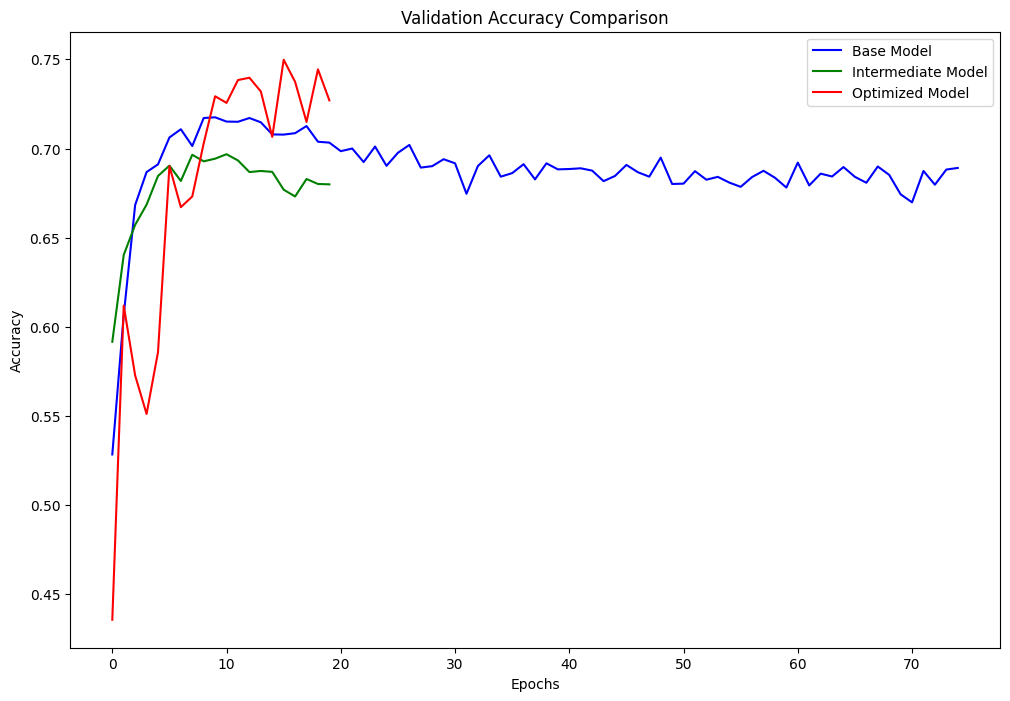

In [ ]:
plt.figure(figsize=(12, 8))
# Wykres dokładności walidacyjnej dla modelu podstawowego
plt.plot(history.history['val_accuracy'], label='Base Model', color='blue')

# Wykres dokładności walidacyjnej dla modelu pośredniego
plt.plot(history_intermediate.history['val_accuracy'], label='Intermediate Model', color='green')

# Wykres dokładności walidacyjnej dla modelu zoptymalizowanego
plt.plot(history_optimized.history['val_accuracy'], label='Optimized Model', color='red')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Wykres straty walidacyjnej dla wszystkich modeli
#### Porównanie straty walidacyjnej dla trzech modeli: podstawowego, pośredniego oraz zoptymalizowanego.


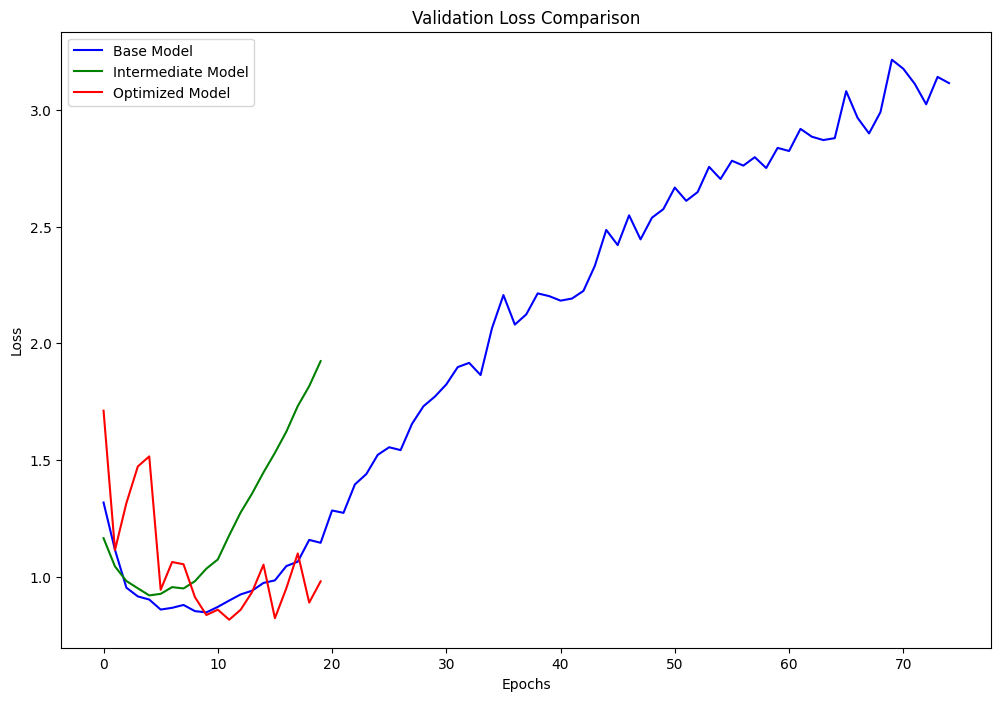

In [ ]:
plt.figure(figsize=(12, 8))
# Wykres straty walidacyjnej dla modelu podstawowego
plt.plot(history.history['val_loss'], label='Base Model', color='blue')

# Wykres straty walidacyjnej dla modelu pośredniego
plt.plot(history_intermediate.history['val_loss'], label='Intermediate Model', color='green')

# Wykres straty walidacyjnej dla modelu zoptymalizowanego
plt.plot(history_optimized.history['val_loss'], label='Optimized Model', color='red')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Wykres dokładności treningowej dla wszystkich modeli
#### Porównanie dokładności treningowej dla trzech modeli: podstawowego, pośredniego oraz zoptymalizowanego.

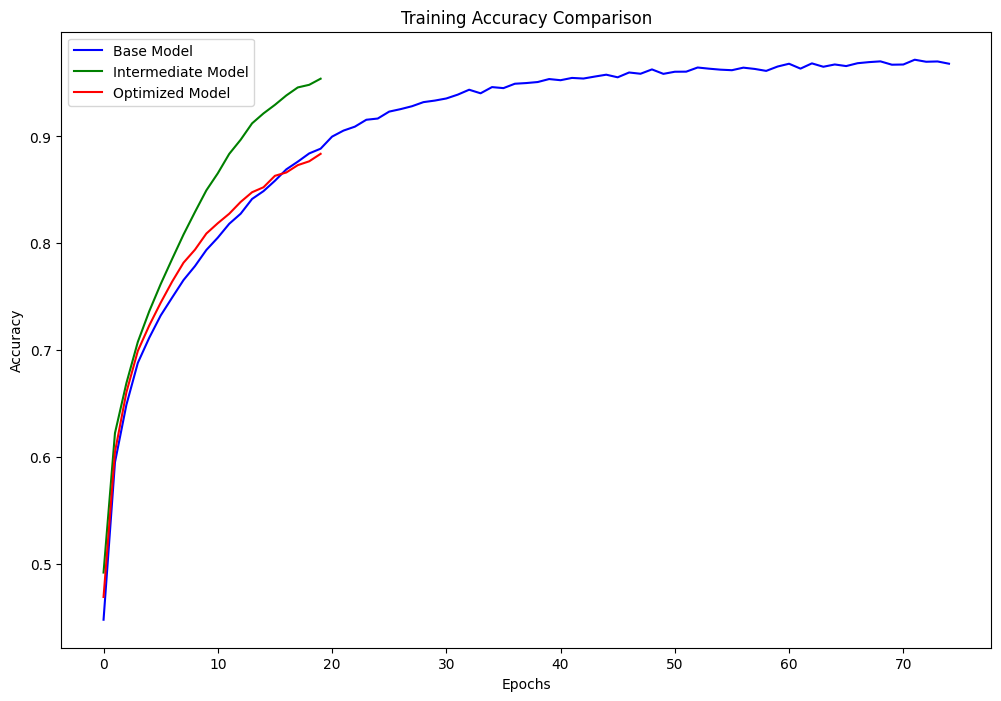

In [ ]:
plt.figure(figsize=(12, 8))
# Wykres dokładności treningowej dla modelu podstawowego
plt.plot(history.history['accuracy'], label='Base Model', color='blue')

# Wykres dokładności treningowej dla modelu pośredniego
plt.plot(history_intermediate.history['accuracy'], label='Intermediate Model', color='green')

# Wykres dokładności treningowej dla modelu zoptymalizowanego
plt.plot(history_optimized.history['accuracy'], label='Optimized Model', color='red')

plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Wykres straty treningowej dla wszystkich modeli
#### Porównanie straty treningowej dla trzech modeli: podstawowego, pośredniego oraz zoptymalizowanego.


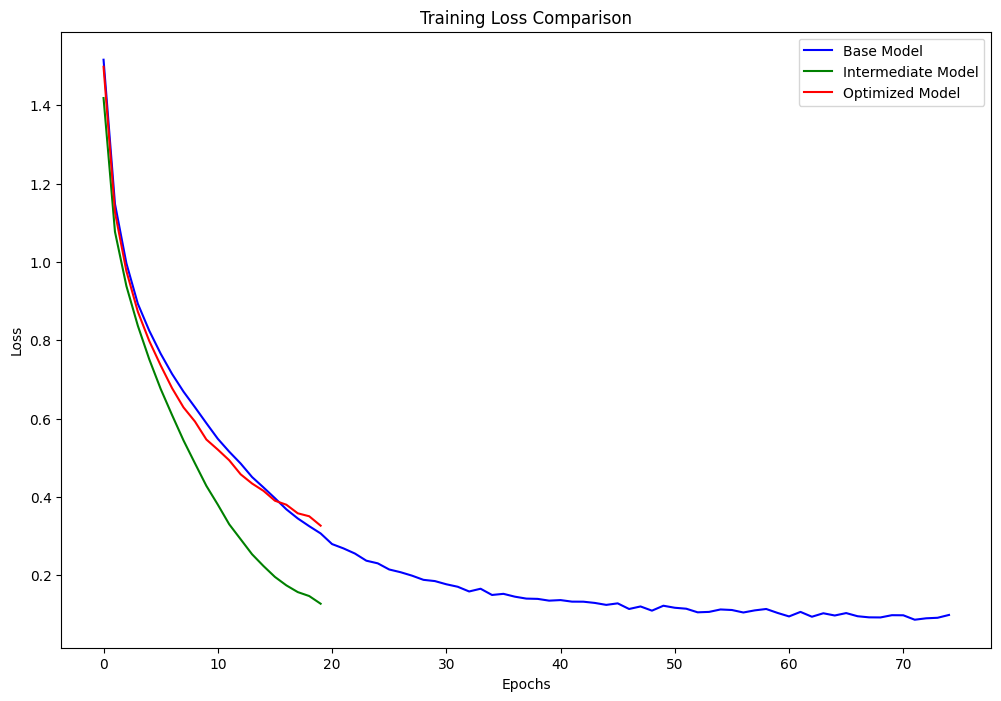

In [ ]:
plt.figure(figsize=(12, 8))
# Wykres straty treningowej dla modelu podstawowego
plt.plot(history.history['loss'], label='Base Model', color='blue')

# Wykres straty treningowej dla modelu pośredniego
plt.plot(history_intermediate.history['loss'], label='Intermediate Model', color='green')

# Wykres straty treningowej dla modelu zoptymalizowanego
plt.plot(history_optimized.history['loss'], label='Optimized Model', color='red')

plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Przewidywanie etykiet dla danych testowych za pomocą modelu podstawowego
#### Model wykonuje przewidywania na zbiorze testowym, a następnie wybiera etykiety o najwyższym prawdopodobieństwie.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.75      0.87      0.80      1000
           2       0.64      0.51      0.57      1000
           3       0.47      0.51      0.49      1000
           4       0.65      0.67      0.66      1000
           5       0.58      0.59      0.58      1000
           6       0.74      0.76      0.75      1000
           7       0.75      0.71      0.73      1000
           8       0.79      0.77      0.78      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



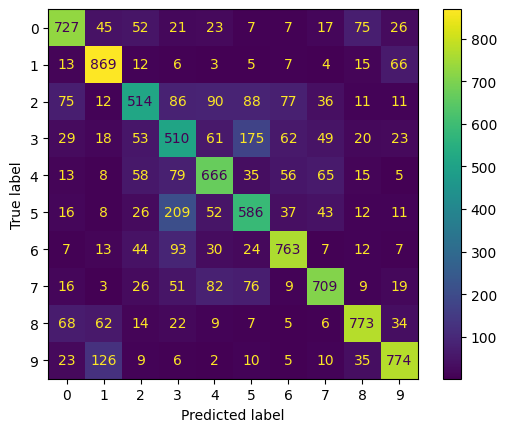

In [ ]:
# Przewidywanie i wybór etykiety z najwyższym prawdopodobieństwem
y_test_pred_base = model.predict(x_test).argmax(axis=-1)

# Przekształcanie etykiet testowych w postać jednoznaczną (z kodowania one-hot)
y_true = y_test.argmax(axis=-1)

# Wyświetlanie raportu klasyfikacji
# Raport zawiera metryki takie jak precyzja, recall oraz f1-score dla każdej z klas
print(classification_report(y_true, y_test_pred_base))

# Wyświetlanie macierzy pomyłek
# Macierz pomyłek pokazuje, jak często klasy zostały błędnie sklasyfikowane przez model
ConfusionMatrixDisplay.from_predictions(y_true, y_test_pred_base)
plt.show()

# Przewidywanie etykiet dla danych testowych za pomocą modelu pośredniego
#### Model wykonuje przewidywania na zbiorze testowym, a następnie wybiera etykiety o najwyższym prawdopodobieństwie.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.78      0.79      0.79      1000
           2       0.57      0.58      0.58      1000
           3       0.52      0.44      0.48      1000
           4       0.60      0.66      0.63      1000
           5       0.56      0.62      0.59      1000
           6       0.77      0.72      0.75      1000
           7       0.74      0.71      0.73      1000
           8       0.77      0.80      0.79      1000
           9       0.79      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



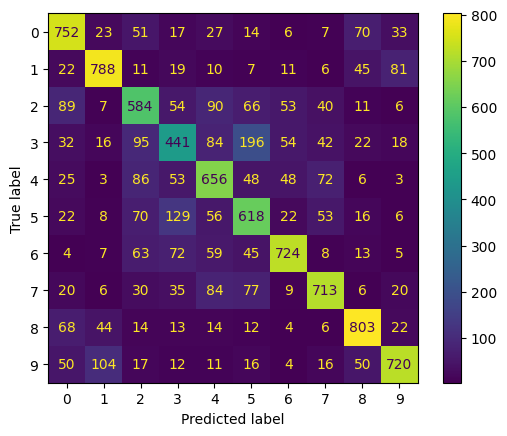

In [ ]:
# Przewidywanie i wybór etykiety z najwyższym prawdopodobieństwem
y_test_pred_inter = intermediate_model.predict(x_test).argmax(axis=-1)

# Wyświetlanie raportu klasyfikacji dla modelu pośredniego
# Raport zawiera metryki takie jak precyzja, recall oraz f1-score dla każdej z klas
print(classification_report(y_true, y_test_pred_inter))

# Wyświetlanie macierzy pomyłek dla modelu pośredniego
# Macierz pomyłek pokazuje, jak często klasy zostały błędnie sklasyfikowane przez model
ConfusionMatrixDisplay.from_predictions(y_true, y_test_pred_inter)

plt.show()

# Przewidywanie etykiet dla danych testowych za pomocą modelu zoptymalizowanego
#### Model wykonuje przewidywania na zbiorze testowym, a następnie wybiera etykiety o najwyższym prawdopodobieństwie.


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1000
           1       0.84      0.88      0.86      1000
           2       0.61      0.63      0.62      1000
           3       0.49      0.66      0.56      1000
           4       0.72      0.64      0.68      1000
           5       0.68      0.55      0.61      1000
           6       0.88      0.70      0.78      1000
           7       0.79      0.76      0.77      1000
           8       0.78      0.87      0.83      1000
           9       0.88      0.74      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



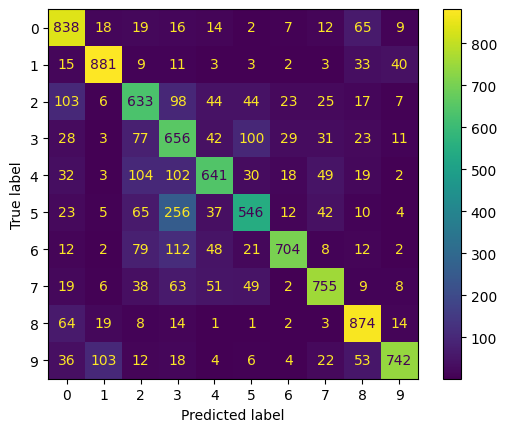

In [ ]:
# Przewidywanie i wybór etykiety z najwyższym prawdopodobieństwem
y_test_pred_opt = optimized_model.predict(x_test).argmax(axis=-1)

# Wyświetlanie raportu klasyfikacji dla modelu zoptymalizowanego
# Raport zawiera metryki takie jak precyzja, recall oraz f1-score dla każdej z klas
print(classification_report(y_true, y_test_pred_opt))

# Wyświetlanie macierzy pomyłek dla modelu zoptymalizowanego
# Macierz pomyłek pokazuje, jak często klasy zostały błędnie sklasyfikowane przez model
ConfusionMatrixDisplay.from_predictions(y_true, y_test_pred_opt)
plt.show()

---